![](https://api.brandy.run/core/core-logo-wide)

# Supervised Learning: Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Mnist dataset

In [2]:
X,y = fetch_openml("mnist_784", return_X_y=True)

In [3]:
X.shape

(70000, 784)

In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y.shape

(70000,)

In [6]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
num_0 = X.iloc[4].values.reshape((28,28))
num_0.shape

(28, 28)

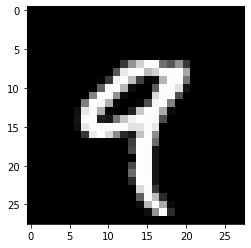

In [29]:
plt.imshow(num_0,cmap="gray")

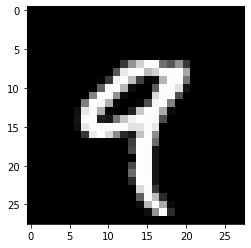

In [17]:
plt.imshow(num_0, cmap="gray")

In [11]:
num_4 = X[y == "4"].iloc[0].values.reshape((28,28))

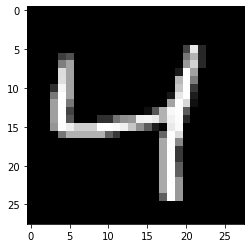

In [12]:
plt.imshow(num_4, cmap="gray")

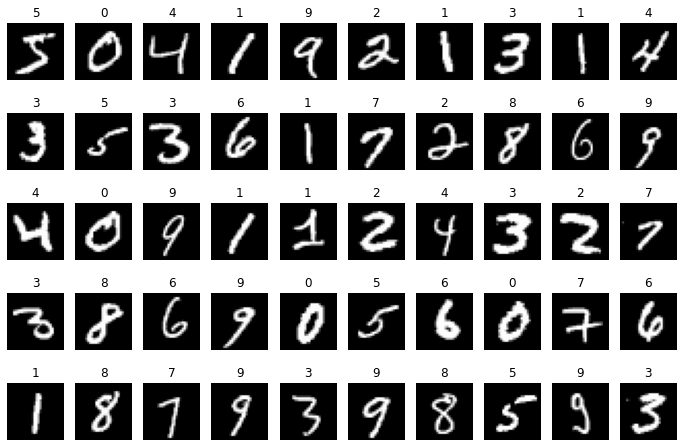

In [13]:
plt.figure(figsize=(12,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.title(y[i])
    plt.imshow(X.iloc[i].values.reshape((28,28)), cmap="gray")
    plt.axis("off")

In [14]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

## Binary Classification

In [32]:
type(y)

pandas.core.series.Series

In [30]:
sevens = y == "7"

In [31]:
sevens.head()

0    False
1    False
2    False
3    False
4    False
Name: class, dtype: bool

In [17]:
sevens.value_counts()

False    62707
True      7293
Name: class, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,sevens)

### Stochastic Gradient Descent


<img src="img/gradient_descent.png" width=600/>

> Si quieres conocer el proceso estadístico de ese modelo en mayor detalle, conoce a uno de los mejores canales sobre estadística en YouTube: [StatQuest](https://www.youtube.com/watch?v=vMh0zPT0tLI)

In [36]:
y_train

45779    False
12829    False
62149    False
32773    False
58017    False
         ...  
24215    False
5276     False
25610     True
30712    False
33659    False
Name: class, Length: 52500, dtype: bool

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
# El modelo Stochastico depende de factores aleatórios, si fuera necesário reproducir resultados,
# usamos el parametro random_state
model = SGDClassifier()

In [40]:
model.fit(X_train, y_train)

SGDClassifier()

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([False, False,  True, ..., False, False, False])

In [43]:
(y_pred == y_test).value_counts()

True     17118
False      382
Name: class, dtype: int64

In [25]:
(y_pred == y_test).sum()/y_pred.shape[0]

0.9782857142857143

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9781714285714286

In [26]:
X_Failed = X_test[y_pred != y_test]

In [27]:
X_Failed.shape

(380, 784)

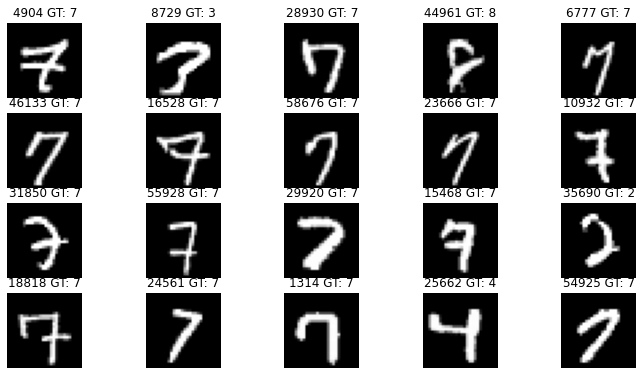

In [28]:
plt.figure(figsize=(12,8))
for i,idx in enumerate(X_Failed.index[:20]):
    plt.subplot(5,5,i+1)

    plt.title(f"{idx} GT: {y[idx]}")
    plt.imshow(X.iloc[idx].values.reshape((28,28)),cmap="gray")
    plt.axis("off")

## StratifiedKFold Cross-Validation

En el caso de los problemas de clasificación, es importante que las diferentes clases tengan presencia significativa en las muestras. Para eso, podemos utilizar el `StratifiedKFold`, que realiza muestreo estratificado.

In [46]:
from sklearn.model_selection import StratifiedKFold

In [47]:
skfolds = StratifiedKFold(n_splits=5)

In [48]:
for train_ind, test_ind in skfolds.split(X,sevens):
    model = SGDClassifier()
    model.fit(X.loc[train_ind], sevens[train_ind])
    y_pred = model.predict(X.loc[test_ind])
    print((y_pred == sevens[test_ind]).sum()/y_pred.shape[0])

0.9740714285714286
0.9724285714285714
0.9773571428571428
0.98
0.9744285714285714


In [49]:
from PIL import Image
from PIL.ImageOps import invert

In [53]:
nums = [Image.open(f"./test_images/{im}.jpg") for im in ["0","7","g"]]
type(nums[0])

PIL.JpegImagePlugin.JpegImageFile

In [55]:
np.array(nums[0]).shape

(28, 28)

In [56]:
imgs = [im for im in nums]

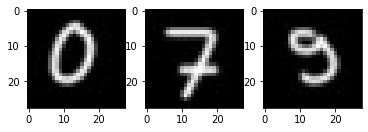

In [57]:
for i,img in enumerate(imgs):
    plt.subplot(1,3,1+i)
    plt.imshow(np.array(img), cmap="gray")

In [58]:
X_new = np.array([np.array(im).flatten() for im in imgs])

In [59]:
X_new.shape

(3, 784)

In [60]:
np.array(imgs[0]).flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   2,   1,   0,   3,   0,
         2,   0,   0,   3,   0,   2,   2,   0,   1,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
         0,   0,   0,   4,   0,   0,   3,   1,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   2,   2,   2,   0,   0,   0,   1,   3,   1,   0,
         1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   6,   0,  10,  45,  83,  74,  18,   6,   0,   0,   0,
         0,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  22,  95, 177, 215, 198,  90,  11,   0,
         3,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   4,  10, 102, 206, 242, 205, 224, 179,
        88,  17,   0,   7,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  10,  98, 206, 223, 16

In [61]:
model.predict(X_new)

/Users/boyander/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False, False,  True])

In [62]:
for im in imgs:
    display(im)

In [125]:
# Another way
from sklearn.model_selection import cross_val_score

In [2]:
cross_val_score(SGDClassifier(), X, sevens, scoring="accuracy", cv=5)

NameError: name 'cross_val_score' is not defined

## Como mejorar el entrenamiento del modelo de ML

1. Augmentar el numero de datapoints
    - Ahora hay 70.000 en este dataset
    - DIbujarlas a mano
    - Haciendo web scraping y generando un nuevo dataset
    - ES MUY COSTOSO si hay que etiquetarlo manualmente \$\$
    - Juntar varios datasets mas pequeños en uno mas grande
2. Features?
    - Mejores features, por ejemplo: Pasando la imagen en color en vez de B&N 
    - Usar data augmentation
    - Enriquecer dataset -> APIS, etc.
3. Mejorar los hiperparametros del modelo
    - Esoger que parametro cambiar, reentrenar y evaluar
4. Probando nuevos algoritmos
    - Ensemble models: https://scikit-learn.org/stable/modules/ensemble.html
    - SGDClassifier()
    - SVC()
